In [1]:
def polynomial_modal(degree=1):
    polynomial_feature = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_feature",polynomial_feature),("linear_regression",linear_regression)])
    return pipeline

SyntaxError: unexpected EOF while parsing (<ipython-input-1-76cd8825449c>, line 1)

degree:2;train score:0.14316669744836197;mean squared error:0.4328537225677121
degree:3;train score:0.268606217862151;mean squared error:0.3694843796552442
degree:5;train score:0.8895357152215185;mean squared error:0.055804176535568246
degree:10;train score:0.9936768565054561;mean squared error:0.003194315850927365


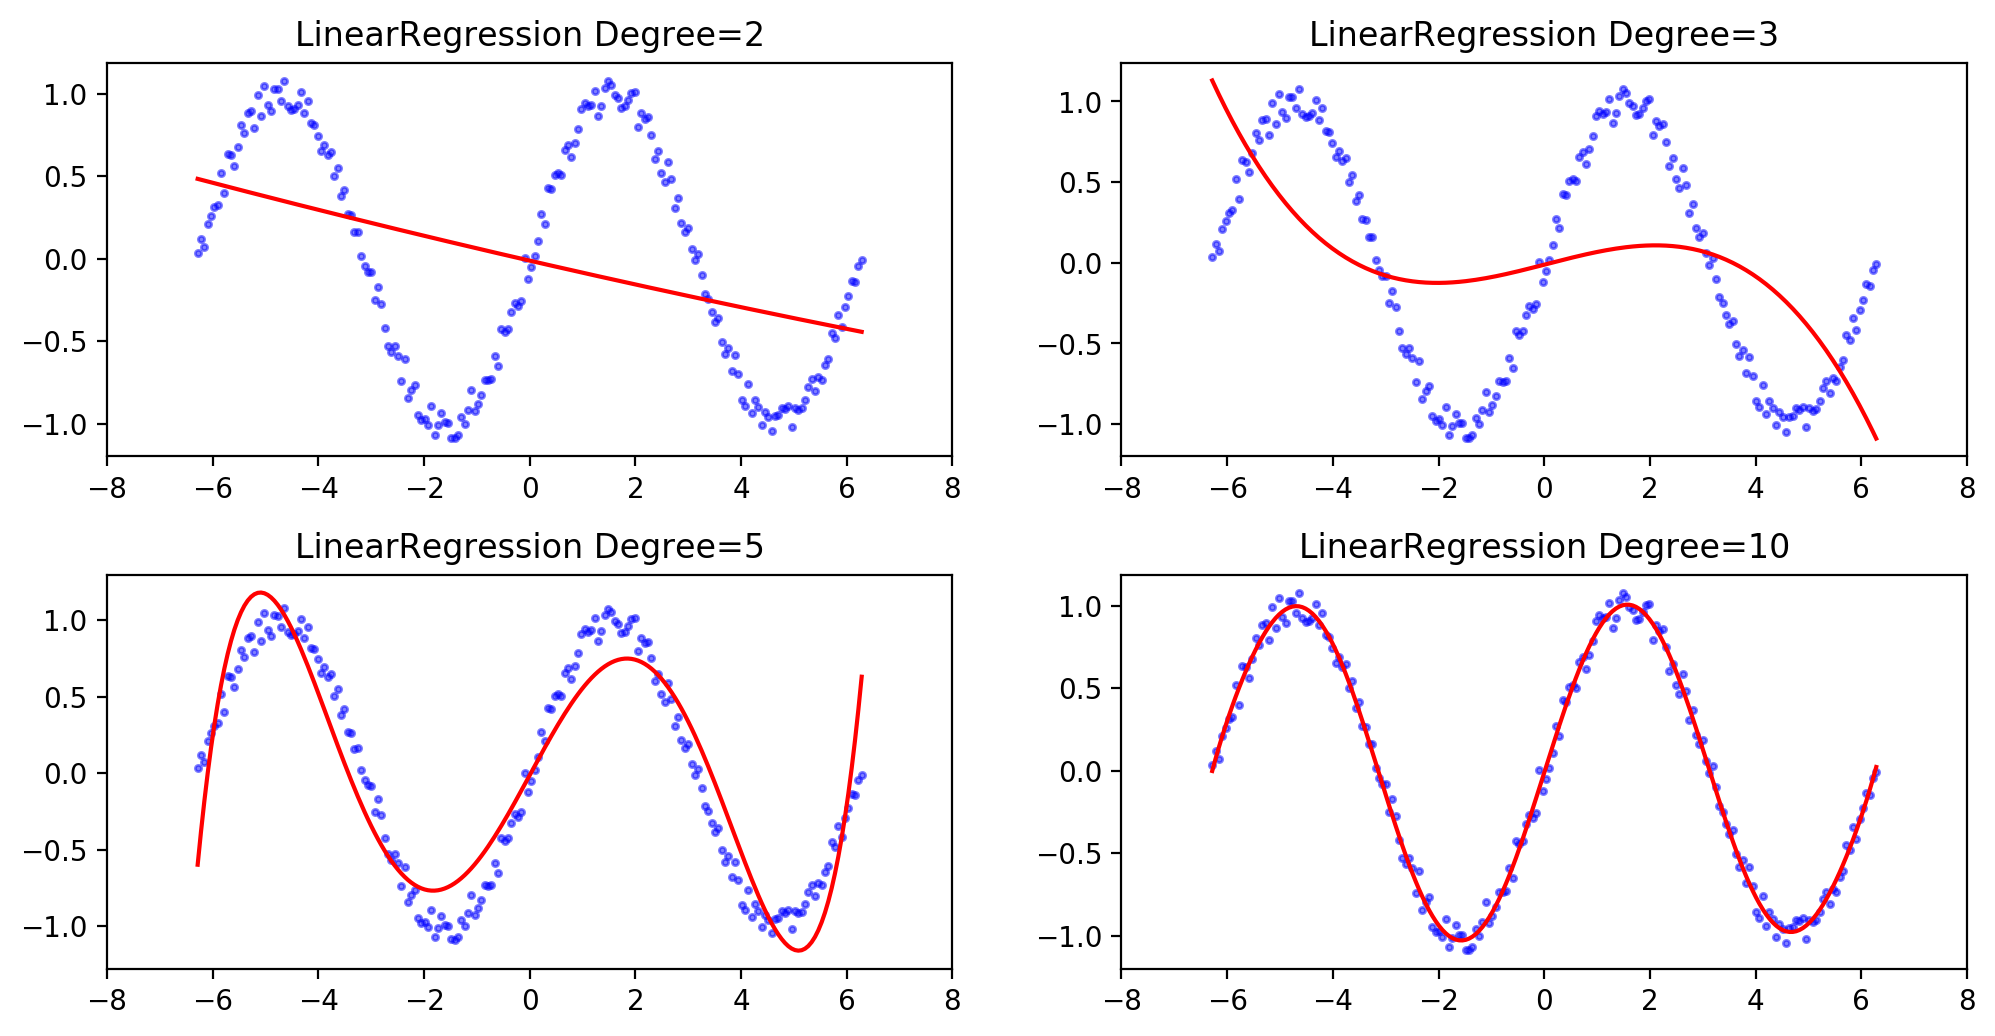

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

n_dots = 200
X = np.linspace(-2*np.pi,2*np.pi,n_dots)
Y = np.sin(X)+0.2*np.random.rand(n_dots)-0.1
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_modal(degree=1):
    polynomial_feature = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_feature",polynomial_feature),("linear_regression",linear_regression)])
    return pipeline

from sklearn.metrics import mean_squared_error

degrees = [2,3,5,10]

results = []

for d in degrees:
    model = polynomial_modal(degree=d)
    model.fit(X,Y)
    train_score = model.score(X,Y)
    mse = mean_squared_error(Y,model.predict(X))
    results.append({"model":model,"degree":d,"score":train_score,"mse":mse})
    
for r in results:
    print("degree:{};train score:{};mean squared error:{}".format(r["degree"],r["score"],r["mse"]))
    
from matplotlib.figure import SubplotParams

plt.figure(figsize=(12,6),dpi = 200,subplotpars = SubplotParams(hspace=0.3))
for i,r in enumerate(results):
    fig = plt.subplot(2,2,i+1)
    plt.xlim(-8,8)
    plt.title("LinearRegression Degree={}".format(r["degree"]))
    plt.scatter(X,Y,s = 5,c='b',alpha=0.5)
    plt.plot(X,r["model"].predict(X),'r-')
    
